# Importing the Appropriate Headers

In [73]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model as lm
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

# Reading the Microwage Dataset

In [3]:
microwage=pd.read_csv("microwage.csv")
microwage.head()


,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage
0,42,6,5170,2601,74,19,0,0,11.99,0,0,0,0,0,1,0,0,10,1.01,92.857140
1,21,26,3720,2602,37,27,0,0,3.19,0,0,0,0,0,1,0,0,10,11.00,196.078430
2,42,6,680,3901,91,30,0,0,11.99,0,0,1,0,0,0,1,1,10,12.01,517.647095
3,42,6,6780,7802,219,21,1,0,13.35,0,0,0,1,0,0,0,0,10,1.65,490.196075
4,42,6,7470,6701,55,40,1,0,7.23,0,0,0,1,0,0,0,0,10,24.00,137.254913


# Descriptive Analysis

### Shape

In [4]:
print("shape \n")
print(microwage.shape)

shape 

(1349258, 20)


### Columns

In [5]:
print("Columns \n")
print(microwage.columns)

Columns 

Index(['region', 'statefip', 'metaread', 'puma', 'perwt', 'age', 'female',
       'race_nonwhite', 'edyrs', 'occ_managprof', 'occ_techsalad',
       'occ_service', 'occ_farm', 'occ_product', 'occ_operator',
       'occ_service_np', 'occ_service_broad', 'industry', 'expyrs', 'wkwage'],
      dtype='object')


### Describe

In [6]:
print("Describe \n")
print(microwage.describe())

Describe 

             region      statefip      metaread          puma         perwt  \
count  1.349258e+06  1.349258e+06  1.349258e+06  1.349258e+06  1.349258e+06   
mean   2.782701e+01  2.784883e+01  3.392802e+03  2.210346e+03  1.046662e+02   
std    1.033126e+01  1.588875e+01  2.966956e+03  2.391580e+03  7.446740e+01   
min    1.100000e+01  1.000000e+00  0.000000e+00  1.000000e+02  1.000000e+00   
25%    2.100000e+01  1.300000e+01  0.000000e+00  8.000000e+02  6.400000e+01   
50%    3.100000e+01  2.700000e+01  3.120000e+03  1.800000e+03  8.500000e+01   
75%    3.300000e+01  4.100000e+01  5.960000e+03  3.202000e+03  1.180000e+02   
max    4.200000e+01  5.600000e+01  9.360000e+03  7.777700e+04  1.954000e+03   

                age        female  race_nonwhite         edyrs  occ_managprof  \
count  1.349258e+06  1.349258e+06   1.349258e+06  1.349258e+06   1.349258e+06   
mean   4.046613e+01  4.989468e-01   1.602207e-01  1.365140e+01   3.188441e-01   
std    1.319065e+01  4.999991e-01 

### Information

In [7]:
print("Info \n")
print(microwage.info())

Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349258 entries, 0 to 1349257
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   region             1349258 non-null  int64  
 1   statefip           1349258 non-null  int64  
 2   metaread           1349258 non-null  int64  
 3   puma               1349258 non-null  int64  
 4   perwt              1349258 non-null  int64  
 5   age                1349258 non-null  int64  
 6   female             1349258 non-null  int64  
 7   race_nonwhite      1349258 non-null  int64  
 8   edyrs              1349258 non-null  float64
 9   occ_managprof      1349258 non-null  int64  
 10  occ_techsalad      1349258 non-null  int64  
 11  occ_service        1349258 non-null  int64  
 12  occ_farm           1349258 non-null  int64  
 13  occ_product        1349258 non-null  int64  
 14  occ_operator       1349258 non-null  int64  
 15  occ_service_np     134925

### Datatypes

In [8]:
print("Checking the Datatypes \n")
print(microwage.dtypes)

Checking the Datatypes 

region                 int64
statefip               int64
metaread               int64
puma                   int64
perwt                  int64
age                    int64
female                 int64
race_nonwhite          int64
edyrs                float64
occ_managprof          int64
occ_techsalad          int64
occ_service            int64
occ_farm               int64
occ_product            int64
occ_operator           int64
occ_service_np         int64
occ_service_broad      int64
industry               int64
expyrs               float64
wkwage               float64
dtype: object


### Checking for NULL values

In [9]:
print("Counting the null values \n")
print(microwage.isnull().sum())

Counting the null values 

region               0
statefip             0
metaread             0
puma                 0
perwt                0
age                  0
female               0
race_nonwhite        0
edyrs                0
occ_managprof        0
occ_techsalad        0
occ_service          0
occ_farm             0
occ_product          0
occ_operator         0
occ_service_np       0
occ_service_broad    0
industry             0
expyrs               0
wkwage               0
dtype: int64


### Checking for NA Values

In [10]:
print("Counting the NAN values \n")
print(microwage.isna().sum())

Counting the NAN values 

region               0
statefip             0
metaread             0
puma                 0
perwt                0
age                  0
female               0
race_nonwhite        0
edyrs                0
occ_managprof        0
occ_techsalad        0
occ_service          0
occ_farm             0
occ_product          0
occ_operator         0
occ_service_np       0
occ_service_broad    0
industry             0
expyrs               0
wkwage               0
dtype: int64


In [1]:
ds = microwage.isin([np.inf, -np.inf]) 
 
count = np.isinf(microwage).values.sum() 
print("It contains " + str(count) + " infinite values") 
print(ds)

NameError: name 'air_quality' is not defined

### Checking for SKewness of Data

In [115]:
columns=microwage.columns
for i in range(0,len(columns)): 
    skew_values = skew(microwage[columns[i]])
    print("Skewness of ",columns[i],": \t",skew_values)

Skewness of  region : 	 -0.20230042032093695
Skewness of  statefip : 	 -0.004301178352905351
Skewness of  metaread : 	 0.3088770985430461
Skewness of  puma : 	 14.86986815952051
Skewness of  perwt : 	 2.651013126661113
Skewness of  age : 	 -0.06263781349433457
Skewness of  female : 	 0.004212695132500821
Skewness of  race_nonwhite : 	 1.8526147849613896
Skewness of  edyrs : 	 -0.8976999355465248
Skewness of  occ_managprof : 	 0.7774454531657388
Skewness of  occ_techsalad : 	 0.8828353702186179
Skewness of  occ_service : 	 1.8099776804057341
Skewness of  occ_farm : 	 10.6111575663805
Skewness of  occ_product : 	 2.8159084844613633
Skewness of  occ_operator : 	 2.37471964537186
Skewness of  occ_service_np : 	 1.9477276078853603
Skewness of  occ_service_broad : 	 1.1231319253242644
Skewness of  industry : 	 -0.8824460302573008
Skewness of  expyrs : 	 0.01890938046530646
Skewness of  wkwage : 	 3.3450421553836


## Exploratory Data Analytics(EDA)

### Checking the relationship between Independent vs Dependent values(Wkwage)

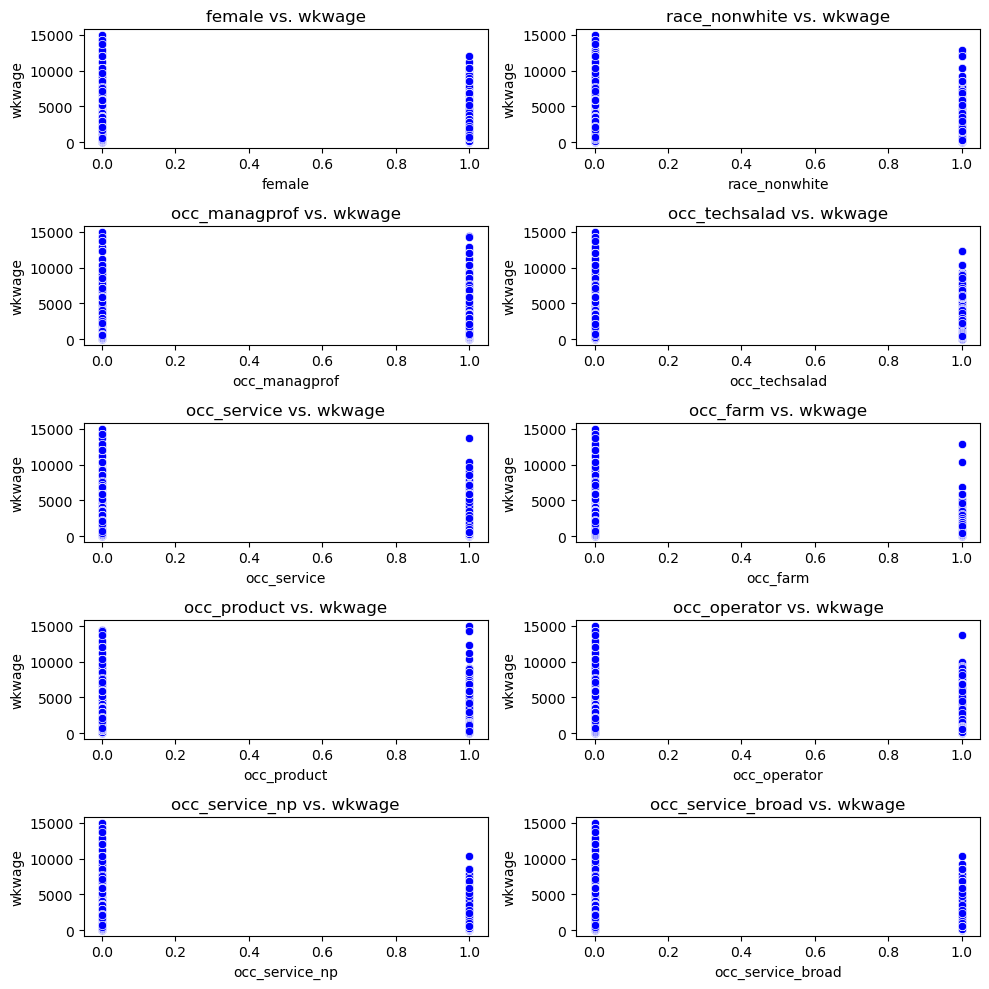

In [27]:
# Get all features
columns = [ 'female','race_nonwhite','occ_managprof', 'occ_techsalad',
       'occ_service', 'occ_farm', 'occ_product', 'occ_operator',
       'occ_service_np', 'occ_service_broad']

##setting up the subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Loop through each feature and plot a scatter plot
for i, column in enumerate(columns):
    ax = axes[i]
    sns.scatterplot(x=column, y='wkwage', data=microwage, ax=ax, color='Blue')
    ax.set_title(f'{column} vs. wkwage')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Display all plots
plt.show()


C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

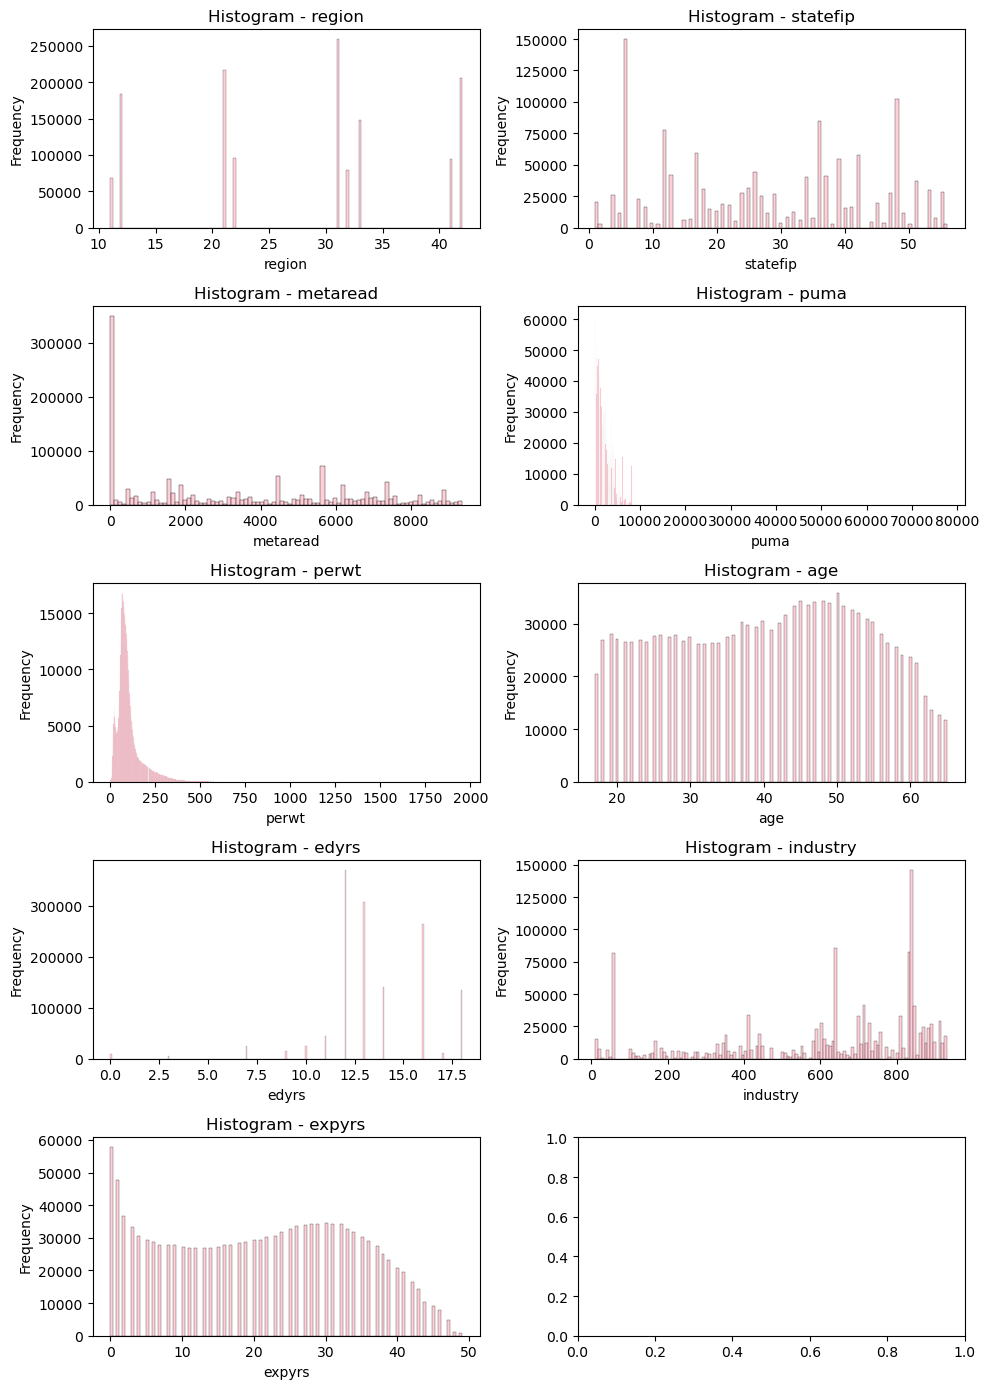

In [93]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 14))

columns=['region', 'statefip', 'metaread', 'puma', 'perwt', 'age', 'edyrs', 'industry', 'expyrs']
# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Loop through each feature and plot a histogram
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(microwage[column], color='pink', ax=ax)
    ax.set_title(f'Histogram - {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

plt.show()

###  Distribution of Weekly Wage

C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


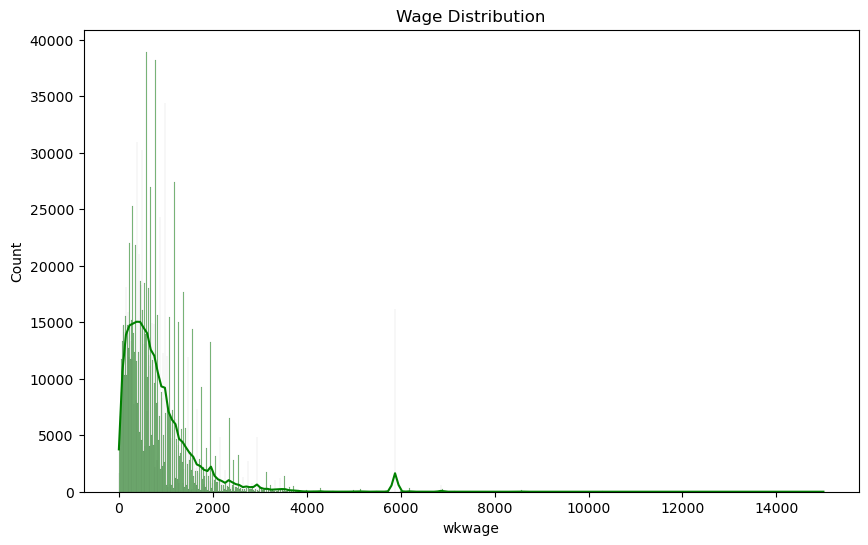

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(x='wkwage', data=microwage,color="green" ,common_norm=False,kde=True)
plt.title('Wage Distribution')
plt.show()

### Distribution of Age

[Text(0, 0, '129181'),
 Text(0, 0, '135388'),
 Text(0, 0, '135710'),
 Text(0, 0, '134264'),
 Text(0, 0, '120010'),
 Text(0, 0, '158520'),
 Text(0, 0, '171947'),
 Text(0, 0, '159573'),
 Text(0, 0, '127627'),
 Text(0, 0, '77038')]

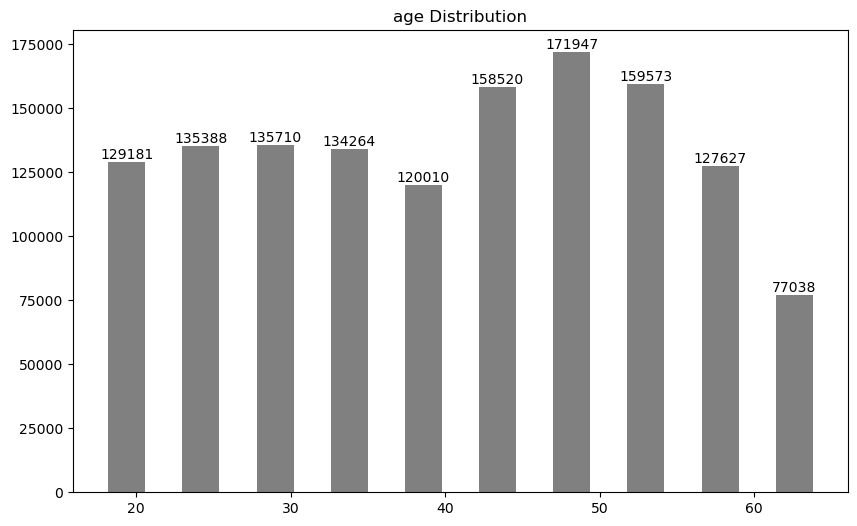

In [94]:
plt.figure(figsize=(10, 6))
counts,edges,bars=plt.hist(x='age',color="grey", data=microwage,rwidth=0.5)
plt.title('age Distribution')
plt.bar_label(bars)

### Distibution of Education Years

[Text(0, 0, '8465'),
 Text(0, 0, '5196'),
 Text(0, 0, '0'),
 Text(0, 0, '24946'),
 Text(0, 0, '0'),
 Text(0, 0, '39393'),
 Text(0, 0, '414303'),
 Text(0, 0, '447652'),
 Text(0, 0, '263343'),
 Text(0, 0, '145960')]

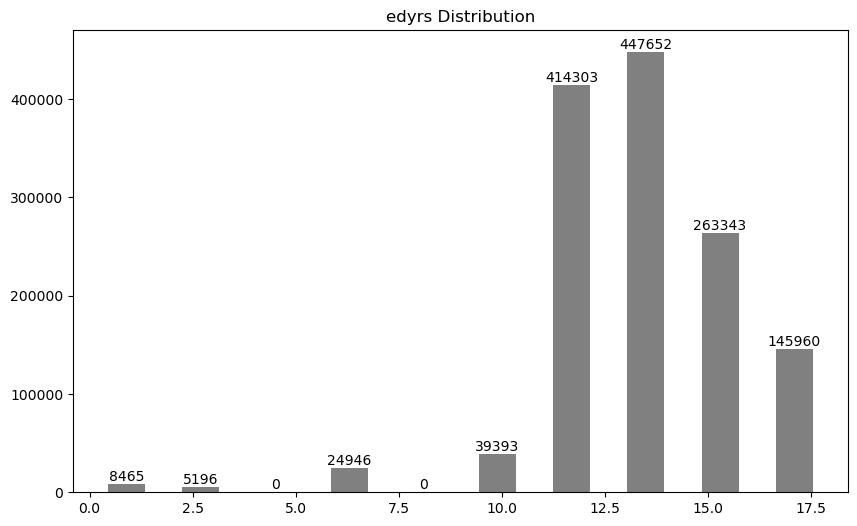

In [113]:
plt.figure(figsize=(10, 6))
counts,edges,bars=plt.hist(x='edyrs',color="grey", data=microwage,rwidth=0.5)
plt.title('edyrs Distribution')
plt.bar_label(bars)

### Distribution of Male and Female

[Text(0, 0, '676050'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '673208')]

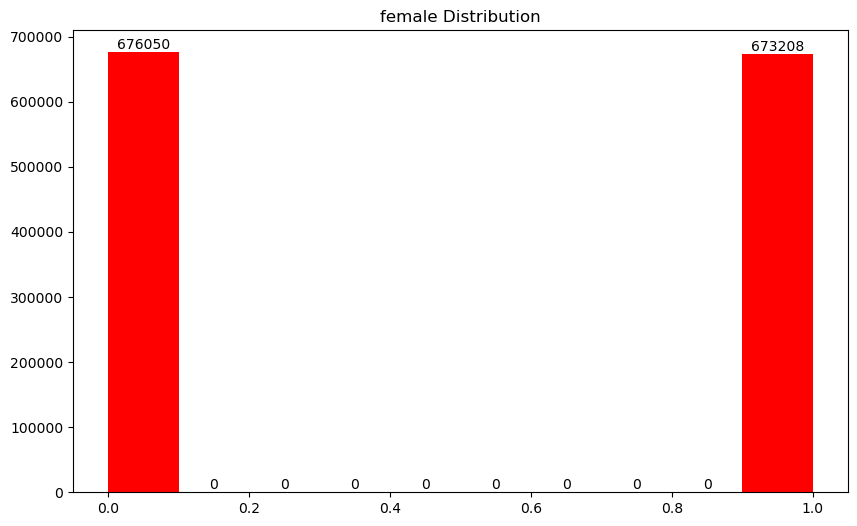

In [112]:
plt.figure(figsize=(10, 6))
counts,edges,bars=plt.hist(x='female',color="red", data=microwage)
plt.title('female Distribution')
plt.bar_label(bars)

### Distribution of Service Jobs

[Text(0, 0, '1.14531e+06'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '203952')]

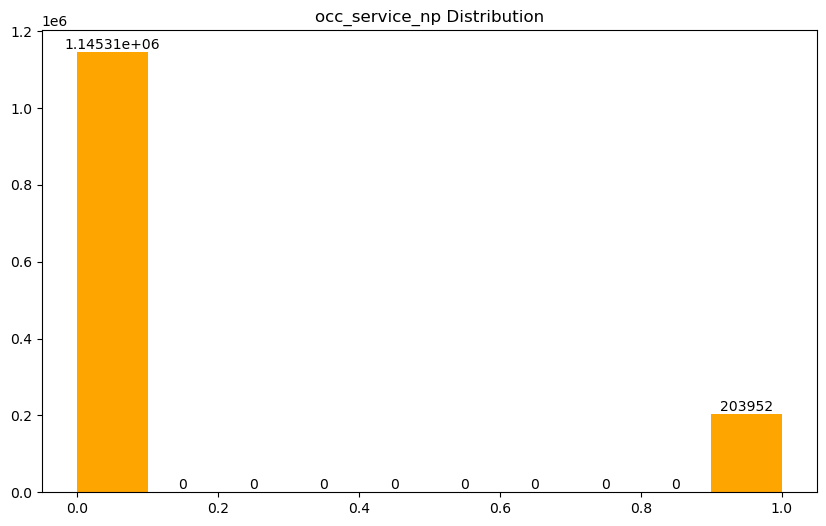

In [111]:
plt.figure(figsize=(10, 6))
counts,edges,bars=plt.hist(x='occ_service_np',color="orange", data=microwage)
plt.title('occ_service_np Distribution')
plt.bar_label(bars)

### Distribution of Service sector

[Text(0, 0, '1.00496e+06'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '344302')]

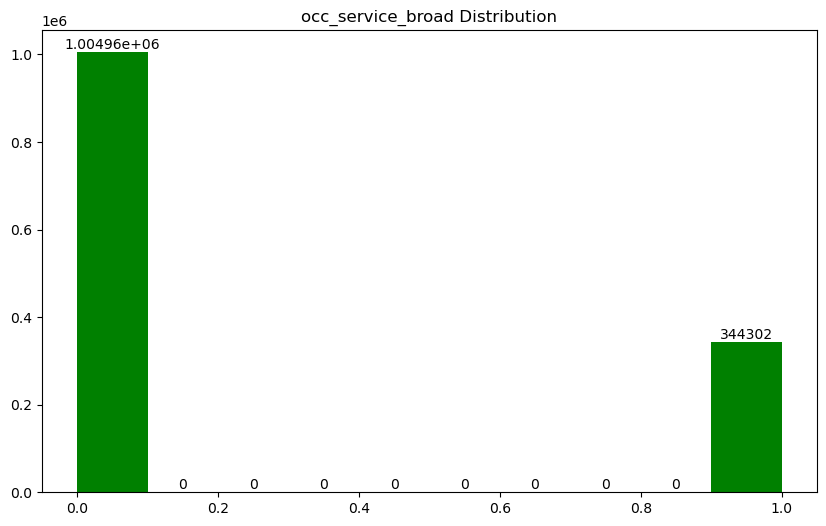

In [110]:
plt.figure(figsize=(10, 6))
counts,edges,bars=plt.hist(x='occ_service_broad',color="green", data=microwage)
plt.title('occ_service_broad Distribution')
plt.bar_label(bars)

### Distribution of Experience years

[Text(0, 0, '205942'),
 Text(0, 0, '141451'),
 Text(0, 0, '134876'),
 Text(0, 0, '140015'),
 Text(0, 0, '150982'),
 Text(0, 0, '168533'),
 Text(0, 0, '167497'),
 Text(0, 0, '134821'),
 Text(0, 0, '81327'),
 Text(0, 0, '23814')]

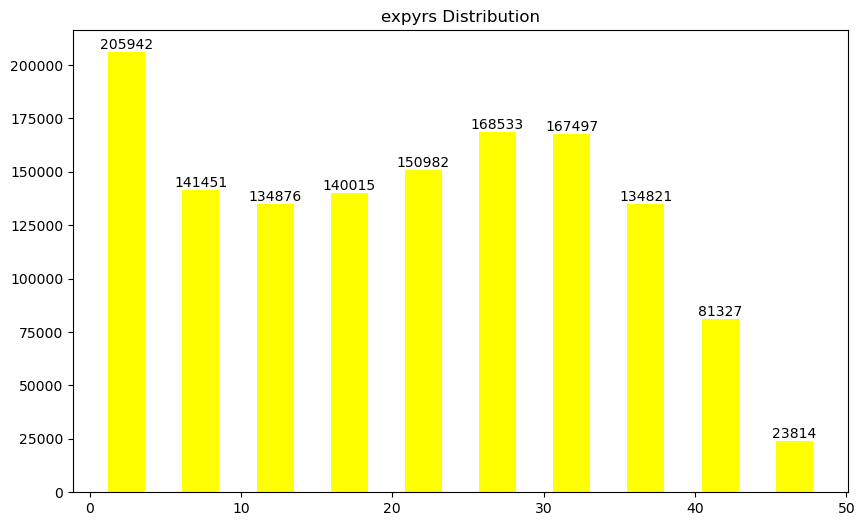

In [109]:
plt.figure(figsize=(10, 6))
counts,edges,bars=plt.hist(x='expyrs',color="yellow", data=microwage, rwidth=0.5)
plt.title('expyrs Distribution')
plt.bar_label(bars)

### Checking the Skewness of Weekly Wage

In [108]:
skewness = skew(microwage['wkwage'])
print(f"Skewness: {skewness}")

Skewness: 3.3450421553836


### Plotting a Correlation Graph to understand Dependence

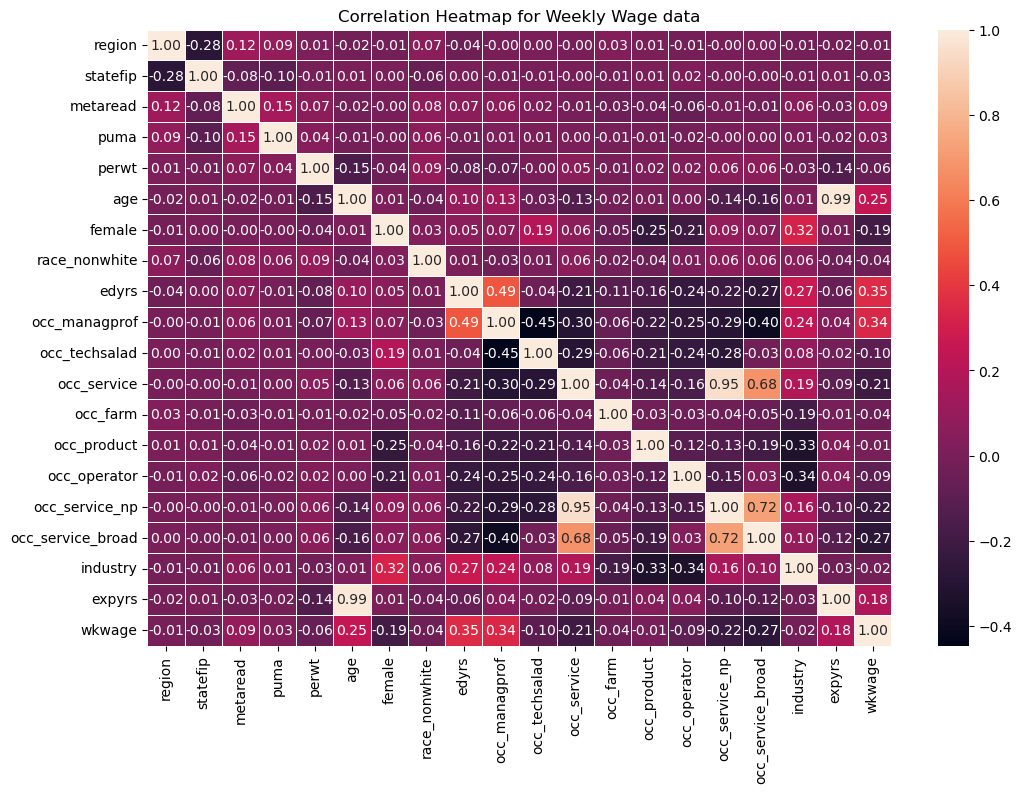

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(microwage.corr(),annot=True, fmt=".2f", linewidths=0.4)
plt.title('Correlation Heatmap for Weekly Wage data')

plt.show()

### Plotting the Correlation HeatMap

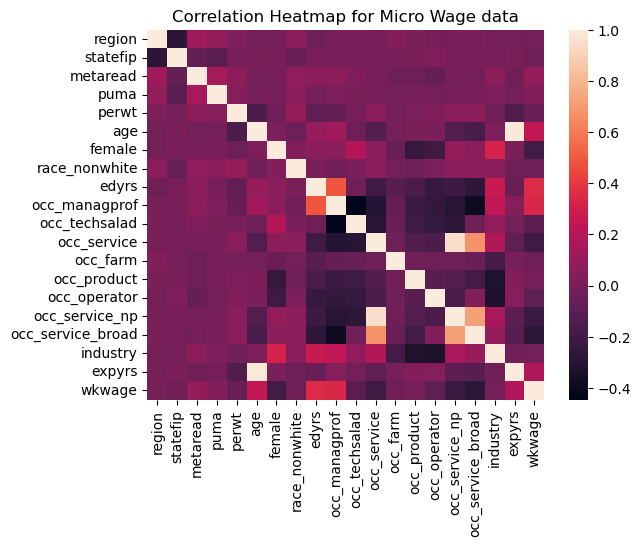

In [105]:
sns.heatmap(microwage.corr())
plt.title('Correlation Heatmap for Micro Wage data')
plt.show()

# Mincers Wage Function to define wage

In [104]:
microwage["edyrs"]=np.round(microwage.edyrs,0).astype(int)
microwage["expyrs"]=np.round(microwage.expyrs,0).astype(int)
microwage["wkwage"]=np.round(microwage.wkwage,0).astype(int)
df1=microwage[microwage["wkwage"]<3000]
df2=df1[df1["edyrs"]>5]
df3=df2[df2["expyrs"]<30]
df4=df3[df3["age"]<60]

df6=df4.groupby(['age', 'female','edyrs', 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad', 'expyrs'],as_index=False).wkwage.mean()




result1 = smf.ols(formula="np.log(df6['wkwage']) ~ df6['edyrs'] + df6['expyrs'] + np.square(df6['expyrs'])", \
data=df6).fit()
print(result1.summary())




                              OLS Regression Results                             
Dep. Variable:     np.log(df6['wkwage'])   R-squared:                       0.536
Model:                               OLS   Adj. R-squared:                  0.536
Method:                    Least Squares   F-statistic:                     1075.
Date:                   Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                           00:44:50   Log-Likelihood:                -1278.9
No. Observations:                   2794   AIC:                             2566.
Df Residuals:                       2790   BIC:                             2590.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

# Multiple Linear Regression to Predict Wage

In [117]:
microwage["edyrs"]=np.round(microwage.edyrs,0).astype(int)
microwage["expyrs"]=np.round(microwage.expyrs,0).astype(int)
microwage["wkwage"]=np.round(microwage.wkwage,0).astype(int)
#print(microwage.head())
#microwage["wkwage"]=microwage["wkwage"].astype(float)
df1=microwage[microwage["wkwage"]<3000]
df2=df1[df1["edyrs"]>5]
df3=df2[df2["expyrs"]<30]
df4=df3[df3["age"]<60]


df5=df4.groupby(['age', 'female','edyrs', 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad', 'expyrs'],as_index=False).wkwage.mean()

df5['wkwage']=np.round(df5.wkwage,0)
df5.sort_values(by="age")


df6=df5.drop_duplicates(subset=['age', 'female','edyrs', 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad', 'expyrs'])
if len(df5)==len(df6):
    print("yes")
#df6['wkwage']=np.log2(df6['wkwage'])
x=df6.drop(["wkwage"],axis=1)
y=df6["wkwage"]

print(y.max())
#print(df5.head())

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

x_1=np.array(x_train.filter(['age', 'female','edyrs', 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad', 'expyrs'],axis=1))

# 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad'
x_test_arr=np.array(x_test.filter(['age', 'female','edyrs', 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad', 'expyrs'],axis=1))



y_1=np.array(y_train)

regr = linear_model.LinearRegression()
regr.fit(x_1, y_1)
print(regr.intercept_, regr.coef_,regr.score(x_1, y_1))

y_predict = regr.predict(x_test_arr)




def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ', round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual Wage")
    plt.ylabel("Predicted Wage")
    plt.title("Actual vs. Predicted Weekly Wages")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()
    
regression_results(y_test,y_predict)
predicted_plot(y_test,y_predict)
residual=residual_plot(y_test,y_predict)
probability_plot(residual)

yes
2088.0
-939.4490141709206 [  89.958413   -206.03305638  -18.48369121  183.8471129   239.92853379
 -333.95664795 -105.81399256  -73.74863043] 0.7621344278925494
explained_variance is  0.78
r2 is  0.7768
MAE is  128.6336
MSE is  30304.8707
RMSE is 174.0829


## Results of Linear Regression

explained_variance is  0.78
r2 is  0.7768
MAE is  128.6336
MSE is  30304.8707
RMSE is 174.0829


## Predicted plot

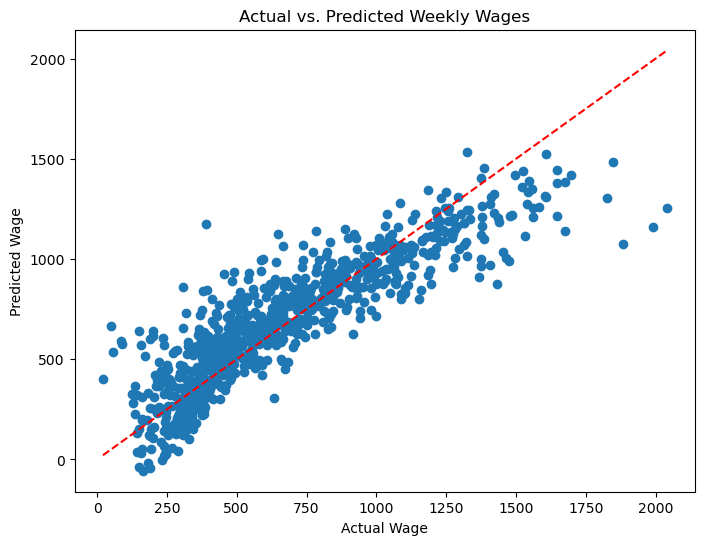

## Residual Plot

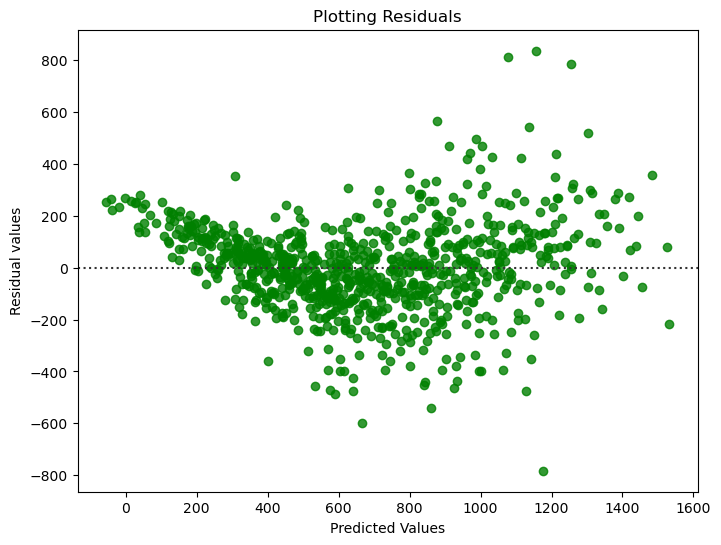

## Probability plot

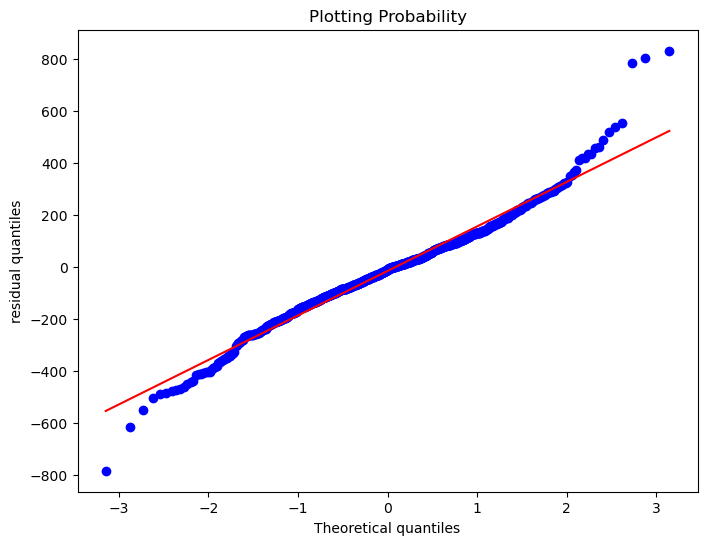

## Actual vs predicted histogram

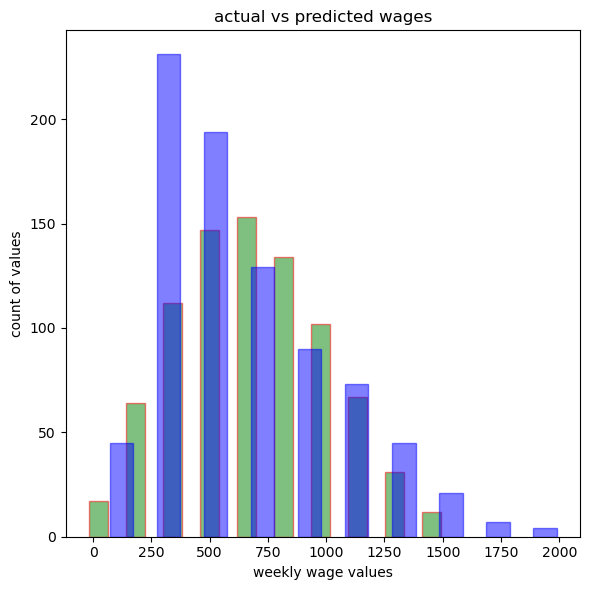

In [65]:
fig, axes = plt.subplots(figsize=(6, 6))


plt.hist(y_predict,label='Predicted',color='green',alpha=0.5,rwidth=0.5,edgecolor="red")
plt.title("actual vs predicted wages")
plt.xlabel("weekly wage values")
plt.ylabel("count of values")
plt.hist(y_test,label='actual',color='blue',alpha=0.5,rwidth=0.5,edgecolor="blue")


# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

plt.show()

# 

### Mean Squared Error using sklearn

In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Square Error
mse = mean_squared_error(y_test, y_predict)

print(f"Mean Square Error: {mse}")

Mean Square Error: 30304.87066662494


## pairplot (adding this at the end because it takes longer to run)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot( microwage.filter(['age', 'female','edyrs', 'occ_managprof', 'occ_service','occ_service_np', 'occ_service_broad', 'expyrs','wkwage']),hue ='wkwage')
    plt.show()